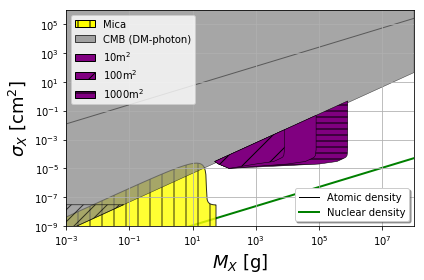

In [26]:
from scipy.interpolate import interp1d
import io
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

from pylab import *

pi=np.pi
#matplotlib.pyplot.clf() #clear the plot
# file = open("mica_constraint.txt", 'r')
# data = file.read()
# cob = data.split()
# cob[0] = np.float(1.9952623149688828e-10)
# print(len(cob))
micalines = np.loadtxt("mica_constraint.txt",delimiter = ",",skiprows=1)



sedismall=[[50,3e-05],[66.6667,2e-05],[142.857, 1e-05], [983.2599294203242, 2e-05], [3642.1507168966027, 3.0000000000000004e-05], 
       [4859.758457374464, 4e-05], [6034.320831319577, 5e-05], [6998.271806730147, 6.000000000000001e-05], 
       [7633.890350328375, 8e-05], [7999.810647507024, 0.0002], [8000.013411656578, 0.00030000000000000003],
       [8000,4.8*10**-3],[50,3e-05]]

sedi = [[50,3e-05],[66.6667,2e-05],[142.857, 1e-05], [9832.59929420324, 2e-05], [36421.507168966025, 3.0000000000000004e-05], 
        [48597.58457374465, 4e-05], [60343.20831319578, 5e-05], [69982.71806730147, 6.000000000000001e-05], 
        [76338.90350328374, 8e-05], [79998.10647507024, 0.0002], [80000.13411656578, 0.00030000000000000003],
        [80000,48*10**-3],[50,3e-05]]

sedilarge = [[50,3e-05],[66.6667,2e-05],[142.857, 1e-05], [98325.99294203242, 2e-05], [364215.07168966025, 3.0000000000000004e-05], 
             [485975.84573744645, 4e-05], [603432.0831319578, 5e-05], [699827.1806730146, 6.000000000000001e-05], 
             [763389.0350328374, 8e-05], [799981.0647507024, 0.0002], [800001.3411656579, 0.00030000000000000003],
             [800000,480*10**-3],[50,3e-05]]

CMB1 = [[10**8,45],[0.066,3*10**-8],[0.001,4.5*10**-10],[0.001,10**7],[10**8,10**7],[10**8,45.1]]

CMB2 = [[0.066,3*10**-8],[0.001,3*10**-8],[0.001,4.5*10**-10],[0.066,3.01*10**-8]]

#CMB constraint (Boehm)
def CMB(M):
    f = 4.5*10**-7 * M
    return f

#LSS constraint (Boehm)
def LSS(M):
    f = 6*10**-10 * M
    return f

#Nuclear Density
def nuc(M):
    f = pi*(3/(4*pi*3.6*10**14))**(2./3) *pow(M,2./3)
    return f

#Black Holes
def BH(M):
    f = pi*(3*10**5)**2 *(M/(2.*10**33))**2
    return f

#Atomic Density
def atom(M):
    f = pi*(3/(4*pi*1*10**0))**(2./3) *pow(M,2./3)
    return f

M1=np.logspace(-3,8)
MMica = np.logspace(-10, 2.204)# for M_max=160g
MMica1 = np.logspace(-12,1.43,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g  1.43 for M_max=27.5g
MMica2 = np.logspace(1.43,1.74,num=1000)

#MMica = np.logspace(-12,1.74,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g
#MSkylab = np.logspace(-18,-6.4,num=1000)
#McausalTE = np.logspace(38.5,log(M1.max()))#total energy
#McausalTM = np.logspace(32,log(M1.max()))#matter

#Define Plot
fig = plt.figure()
ax = fig.add_subplot(111)

#X-axis
ax.set_xlabel('$M_\t{X}$ [g]',fontsize=18)
#xmin=-2
#xmax=40
ax.set_xlim([M1.min(),M1.max()])

#Y-axis
ymin=10**-9#nuc(M1).min()#10**(-15)
ymax=float(10**6)#nuc(M1).max()#10**15
ax.set_ylim([ymin,ymax])
ax.set_ylabel('$\sigma_\t{X}$ [cm$^{2}$]',fontsize=18)

#Make Plot
ax.loglog(M1, atom(M1), 'k', markersize=4, color='k',lw=1,label='Atomic density',zorder=0)
ax.loglog(M1, nuc(M1), 'k', markersize=4, color='g',lw=2,label='Nuclear density',zorder=0)

line3 = plt.Polygon(micalines, closed=None, fill=True, facecolor='yellow', edgecolor='black',alpha=0.8, hatch="|",lw=1,zorder=0)# edgecolor='r'
plt.gca().add_line(line3)

#plt.fill_between(M1, SIDM(M1),ymax,where=None, color='0.5',edgecolor='black',hatch="\\",alpha=.6,zorder=4)#SIDM 
linesCMB = plt.Polygon(CMB1, closed = True, fill = True, facecolor = 'grey', edgecolor='black',alpha = 0.7, lw = 0.5,hatch = "",zorder=1)
plt.gca().add_line(linesCMB)

linesCMB = plt.Polygon(CMB2, closed = True, fill = False, facecolor = 'grey', edgecolor='black',alpha = 0.7, lw = 0.8,hatch = "//",zorder=2)
plt.gca().add_line(linesCMB)

lines1 = plt.Polygon(sedi, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.5,hatch = "",zorder=3)
plt.gca().add_line(lines1)

lines2 = plt.Polygon(sedismall, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.5,hatch = "/",zorder=4)
plt.gca().add_line(lines2)

lines3 = plt.Polygon(sedilarge, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.5,hatch = "--",zorder=2)
plt.gca().add_line(lines3)

# line8 = plt.Polygon(augersmall, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.1,hatch = "",zorder=2)
# plt.gca().add_line(line8)

# line9 = plt.Polygon(augerbig, closed = True, fill = True, facecolor = 'purple', alpha = 1, lw = 0.1,hatch = "//",zorder=1)
# plt.gca().add_line(line9)

# lineh = plt.Polygon(JEM, closed = True, fill = True, facecolor = 'green', alpha = 1, lw = 0.1,hatch = "",zorder=0)
# plt.gca().add_line(lineh)

# linebolide = plt.Polygon(bolidespace, closed=None, fill=True, facecolor='blue', edgecolor='black',alpha=0.8, hatch="",lw=1,zorder=5)# edgecolor='r'
# plt.gca().add_line(linebolide)

legBoehm_CMB = Rectangle((0, 0), 1, 1, fc='grey',edgecolor='black', hatch="",alpha=.7)
legMicaEl = Rectangle((0, 0), 1, 1, fc="yellow",edgecolor='black', hatch="|",alpha=1)
legsedi1 = Rectangle((0, 0), 1, 1, fc="purple",edgecolor='black', hatch="",alpha=1)
legsedi2 = Rectangle((0, 0), 1, 1, fc="purple",edgecolor='black', hatch="/",alpha=1)
legsedi3 = Rectangle((0, 0), 1, 1, fc="purple",edgecolor='black', hatch="--",alpha=1)

# legauger = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="")
# legaugerfull = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="//")
# legJEM = Rectangle((0, 0), 1, 1,fc="green", edgecolor='black', alpha=1, hatch="")
# legbolide=Rectangle((0, 0), 1, 1,fc="blue", edgecolor='black', alpha=1, hatch="")

leg = ax.legend(loc='lower right', shadow=True)
leg2 = legend(([legMicaEl, legBoehm_CMB, legsedi1, legsedi2, legsedi3]),[ "Mica", "CMB (DM-photon)", "10m$^2$", "100m$^2$", "1000m$^2$"],loc='upper left')
gca().add_artist(leg) #Needto add this back otherwise leg2 removes it  ,legBBNcausalT,legBBNcausalM   ,"Causality (T)","Causality (M)"

ax.grid(True)
plt.tight_layout()
plt.savefig('granite_figure.pdf')

plt.show()

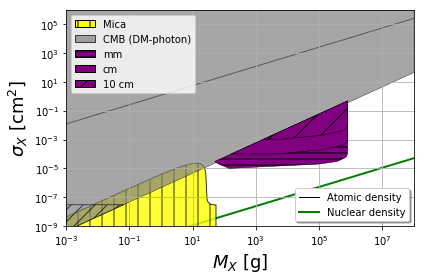

In [25]:
from scipy.interpolate import interp1d
import io
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import os

from pylab import *

pi=np.pi
#matplotlib.pyplot.clf() #clear the plot
# file = open("mica_constraint.txt", 'r')
# data = file.read()
# cob = data.split()
# cob[0] = np.float(1.9952623149688828e-10)
# print(len(cob))
micalines = np.loadtxt("mica_constraint.txt",delimiter = ",",skiprows=1)


granitemm = [[50,3e-05],[66.6667,2e-05],[142.857, 1e-05], [98325.99294203242, 2e-05], [364215.07168966025, 3.0000000000000004e-05], 
             [485975.84573744645, 4e-05], [603432.0831319578, 5e-05], [699827.1806730146, 6.000000000000001e-05], 
             [763389.0350328374, 8e-05], [799981.0647507024, 0.0002], [800001.3411656579, 0.00030000000000000003],
             [800000,480*10**-3],[50,3e-05]]

granitecm = [[4611.222788323133, 0.0001], [127685.86291654946, 0.0002], [297856.7828946357, 0.00030000000000000003], 
             [527979.7480802125, 0.0004], [636190.7578374096, 0.0005], [720667.7517672464, 0.0007000000000000001], 
             [773192.782077309, 0.0009], [799993.6219855543, 0.002], [800000.4834848014, 0.003],[800000,0.48],[167,0.0001]]

granite10cm = [[4611.222788323133, 0.001], [127685.86291654946, 0.002], [297856.7828946357, 0.003], 
               [527979.7480802125, 0.004], [636190.7578374096, 0.005], [720667.7517672464, 0.006999999999999999], 
               [773192.782077309, 0.009],[800000,0.01],[800000,0.48],[1667,0.001]]

CMB1 = [[10**8,45],[0.066,3*10**-8],[0.001,4.5*10**-10],[0.001,10**7],[10**8,10**7],[10**8,45.1]]

CMB2 = [[0.066,3*10**-8],[0.001,3*10**-8],[0.001,4.5*10**-10],[0.066,3.01*10**-8]]

#CMB constraint (Boehm)
def CMB(M):
    f = 4.5*10**-7 * M
    return f

#LSS constraint (Boehm)
def LSS(M):
    f = 6*10**-10 * M
    return f

#Nuclear Density
def nuc(M):
    f = pi*(3/(4*pi*3.6*10**14))**(2./3) *pow(M,2./3)
    return f

#Black Holes
def BH(M):
    f = pi*(3*10**5)**2 *(M/(2.*10**33))**2
    return f

#Atomic Density
def atom(M):
    f = pi*(3/(4*pi*1*10**0))**(2./3) *pow(M,2./3)
    return f

M1=np.logspace(-3,8)
MMica = np.logspace(-10, 2.204)# for M_max=160g
MMica1 = np.logspace(-12,1.43,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g  1.43 for M_max=27.5g
MMica2 = np.logspace(1.43,1.74,num=1000)

#MMica = np.logspace(-12,1.74,num=1000)#  2.204 for M_max=160g  1.74 for M_max = 55g
#MSkylab = np.logspace(-18,-6.4,num=1000)
#McausalTE = np.logspace(38.5,log(M1.max()))#total energy
#McausalTM = np.logspace(32,log(M1.max()))#matter

#Define Plot
fig = plt.figure()
ax = fig.add_subplot(111)

#X-axis
ax.set_xlabel('$M_\t{X}$ [g]',fontsize=18)
#xmin=-2
#xmax=40
ax.set_xlim([M1.min(),M1.max()])

#Y-axis
ymin=10**-9#nuc(M1).min()#10**(-15)
ymax=float(10**6)#nuc(M1).max()#10**15
ax.set_ylim([ymin,ymax])
ax.set_ylabel('$\sigma_\t{X}$ [cm$^{2}$]',fontsize=18)

#Make Plot
ax.loglog(M1, atom(M1), 'k', markersize=4, color='k',lw=1,label='Atomic density',zorder=0)
ax.loglog(M1, nuc(M1), 'k', markersize=4, color='g',lw=2,label='Nuclear density',zorder=0)

line3 = plt.Polygon(micalines, closed=None, fill=True, facecolor='yellow', edgecolor='black',alpha=0.8, hatch="|",lw=1,zorder=0)# edgecolor='r'
plt.gca().add_line(line3)

#plt.fill_between(M1, SIDM(M1),ymax,where=None, color='0.5',edgecolor='black',hatch="\\",alpha=.6,zorder=4)#SIDM 
linesCMB = plt.Polygon(CMB1, closed = True, fill = True, facecolor = 'grey', edgecolor='black',alpha = 0.7, lw = 0.5,hatch = "",zorder=1)
plt.gca().add_line(linesCMB)

linesCMB = plt.Polygon(CMB2, closed = True, fill = False, facecolor = 'grey', edgecolor='black',alpha = 0.7, lw = 0.8,hatch = "//",zorder=2)
plt.gca().add_line(linesCMB)

lines1 = plt.Polygon(granitecm, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.5,hatch = "",zorder=3)
plt.gca().add_line(lines1)

lines2 = plt.Polygon(granite10cm, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.5,hatch = "/",zorder=4)
plt.gca().add_line(lines2)

lines3 = plt.Polygon(granitemm, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.5,hatch = "--",zorder=2)
plt.gca().add_line(lines3)

# line8 = plt.Polygon(augersmall, closed = True, fill = True, facecolor = 'purple', edgecolor='black',alpha = 1, lw = 0.1,hatch = "",zorder=2)
# plt.gca().add_line(line8)

# line9 = plt.Polygon(augerbig, closed = True, fill = True, facecolor = 'purple', alpha = 1, lw = 0.1,hatch = "//",zorder=1)
# plt.gca().add_line(line9)

# lineh = plt.Polygon(JEM, closed = True, fill = True, facecolor = 'green', alpha = 1, lw = 0.1,hatch = "",zorder=0)
# plt.gca().add_line(lineh)

# linebolide = plt.Polygon(bolidespace, closed=None, fill=True, facecolor='blue', edgecolor='black',alpha=0.8, hatch="",lw=1,zorder=5)# edgecolor='r'
# plt.gca().add_line(linebolide)

legBoehm_CMB = Rectangle((0, 0), 1, 1, fc='grey',edgecolor='black', hatch="",alpha=.7)
legMicaEl = Rectangle((0, 0), 1, 1, fc="yellow",edgecolor='black', hatch="|",alpha=1)
legsedi1 = Rectangle((0, 0), 1, 1, fc="purple",edgecolor='black', hatch="--",alpha=1)
legsedi2 = Rectangle((0, 0), 1, 1, fc="purple",edgecolor='black', hatch="",alpha=1)
legsedi3 = Rectangle((0, 0), 1, 1, fc="purple",edgecolor='black', hatch="//",alpha=1)

# legauger = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="")
# legaugerfull = Rectangle((0, 0), 1, 1,fc="purple", edgecolor='black', alpha=1, hatch="//")
# legJEM = Rectangle((0, 0), 1, 1,fc="green", edgecolor='black', alpha=1, hatch="")
# legbolide=Rectangle((0, 0), 1, 1,fc="blue", edgecolor='black', alpha=1, hatch="")

leg = ax.legend(loc='lower right', shadow=True)
leg2 = legend(([legMicaEl, legBoehm_CMB, legsedi1, legsedi2, legsedi3]),[ "Mica", "CMB (DM-photon)", "mm", "cm", "10 cm"],loc='upper left')
gca().add_artist(leg) #Needto add this back otherwise leg2 removes it  ,legBBNcausalT,legBBNcausalM   ,"Causality (T)","Causality (M)"

ax.grid(True)
plt.tight_layout()
plt.savefig('granite_second_figure.pdf')

plt.show()